In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Navigating to google drive
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
# Unzipping the files
!unzip samples1-200.zip
!unzip samples201-400.zip
!unzip samples401-600.zip
!unzip samples601-800.zip
!unzip samples801-1000.zip

Archive:  samples1-200.zip
replace aaqzm.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  samples201-400.zip
replace eossn.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  samples401-600.zip
replace kkhvr.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  samples601-800.zip
replace ppqfc.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  samples801-1000.zip
replace ursue.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [4]:
import cv2
import os
import numpy as np

# Create an empty list to store the split grayscale images
split_images = []
names = []

# Loop through all files in the directory
for filename in os.listdir('.'):
    # Check if the file is an image
    if filename.endswith('.png'):
        letters = filename.split(".")[0]
        # Read the image using OpenCV
        image = cv2.imread(filename)
        # Convert the image to grayscale
        grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # Split the grayscale image into five equal parts
        height, width = grayscale_image.shape
        split_width = width // 5
        for i in range(5):
            start = i * split_width
            end = (i + 1) * split_width
            split_image = grayscale_image[:, start:end]
            # Append the split grayscale image to the list
            split_images.append(split_image)
            names.append(letters[i])

# Convert the list of split grayscale images to a NumPy array
split_images_array = np.array(split_images)

In [5]:
# A single character gray scale image forms a numpy array like this
split_images_array[0]

array([[248, 248, 248, ..., 248, 248, 248],
       [248, 248, 248, ..., 231, 231, 248],
       [248, 248, 248, ..., 111, 197, 248],
       ...,
       [248, 248, 248, ..., 111, 231, 248],
       [248, 248, 248, ..., 197, 231, 248],
       [248, 248, 248, ..., 248, 248, 248]], dtype=uint8)

In [6]:
# Appying thresholding
import skimage.io as io
import numpy as np
from matplotlib import pyplot as plt
from skimage.filters import threshold_otsu
from skimage.morphology import erosion, dilation
%matplotlib inline

split_images_binary = []

# Loop through all split images
for img in split_images_array:
    # Apply thresholding to convert the image to binary
    th = threshold_otsu(img)
    # _, binary_image = cv2.threshold(img, th, 255, cv2.THRESH_BINARY)
    binary_image = img > th
    # Append the binary image to the list
    split_images_binary.append(binary_image)

# Convert the list of binary images to a NumPy array
split_images_binary_array = np.array(split_images_binary)

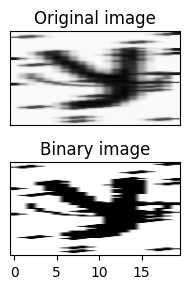

y


In [9]:
#Printing image to observe changes
imgno = 100
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(2, 3))
ax1.imshow(split_images[imgno], 'gray', aspect='auto')
ax1.set_title('Original image')
ax1.set_xticks([])
ax1.set_yticks([])
ax2.imshow(split_images_binary[imgno], 'gray', aspect='auto')
ax2.set_title('Binary image')
ax2.set_yticks([])
plt.tight_layout()
plt.show()
print(names[imgno])

In [10]:
# First dilation
split_images_dilation = []

for img in split_images_binary:
    kernel = np.ones((3,3), np.uint8)
    img_dilated = dilation(img, kernel)
    split_images_dilation.append(img_dilated)

split_images_dilation_array = np.array(split_images_dilation)

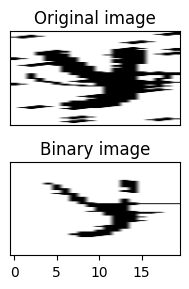

y


In [11]:
# Printing image to observe changes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(2, 3))
ax1.imshow(split_images_binary[imgno], 'gray', aspect='auto')
ax1.set_title('Original image')
ax1.set_xticks([])
ax1.set_yticks([])
ax2.imshow(split_images_dilation[imgno], 'gray', aspect='auto')
ax2.set_title('Binary image')
ax2.set_yticks([])
plt.tight_layout()
plt.show()
print(names[imgno])

In [12]:
# First erosion after 1 dilation
split_images_erosion = []

for img_dilated in split_images_dilation:
    img_eroded = erosion(img_dilated)
    split_images_erosion.append(img_eroded)

split_images_erosion_array = np.array(split_images_erosion)

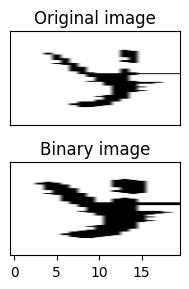

y


In [13]:
# Printing image to observe changes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(2, 3))
ax1.imshow(split_images_dilation[imgno], 'gray', aspect='auto')
ax1.set_title('Original image')
ax1.set_xticks([])
ax1.set_yticks([])
ax2.imshow(split_images_erosion[imgno], 'gray', aspect='auto')
ax2.set_title('Binary image')
ax2.set_yticks([])
plt.tight_layout()
plt.show()
print(names[imgno])

In [14]:
# Second dilation after 1 dilation and 1 erosion
split_images_ded = []

for img in split_images_erosion:
    kernel = np.ones((4,1), np.uint8)
    img_ded = dilation(img, kernel)
    split_images_ded.append(img_ded)

split_images_ded_array = np.array(split_images_ded)

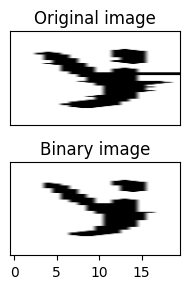

y


In [15]:
# Printing image to observe changes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(2, 3))
ax1.imshow(split_images_erosion[imgno], 'gray', aspect='auto')
ax1.set_title('Original image')
ax1.set_xticks([])
ax1.set_yticks([])
ax2.imshow(split_images_ded[imgno], 'gray', aspect='auto')
ax2.set_title('Binary image')
ax2.set_yticks([])
plt.tight_layout()
plt.show()
print(names[imgno])

In [27]:
# Splitting into test and train datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Assuming you have split_images_array and names
# Preprocess the data
# After checking all possible cases, we have used 1 dilation and 1 erosion to get best results
X = split_images_erosion_array.reshape(split_images_erosion_array.shape[0], -1) / 32
y = names

# Maintaining a numpy array with proper image shapes for training neural network
X_nn =split_images_erosion_array

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_nn, y, test_size=0.2, random_state=1)

In [17]:
# Train the logistic regression model
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

# Predict the labels for the test data
y_pred_lr = model_lr.predict(X_test)

In [18]:
# Train the svm model
model_svm = SVC(C=2, kernel = 'rbf', gamma = 10)
model_svm.fit(X_train, y_train)

# Predict the labels for the test data
y_pred_svm = model_svm.predict(X_test)

In [19]:
# Train the random forest model
model_rf = RandomForestClassifier(n_estimators=650, criterion = 'gini', max_depth = 100, min_samples_split = 3, max_features = 'log2')
model_rf.fit(X_train, y_train)

# Predict the labels for the test data
y_pred_rf = model_rf.predict(X_test)

In [ ]:
# Evaluate the scores of the LR
accuracy_lr = accuracy_score(y_test, y_pred_lr)
ps_lr = precision_score(y_test, y_pred_lr, average='weighted')
rs_lr = recall_score(y_test, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')
print("Accuracy of Logistic Regression:", accuracy_lr*100)
print("Precison score of Logistic Regression:", ps_lr)
print("Recall Score of Logistic Regression:", rs_lr)
print("F1 Score of Logistic Regression:", f1_lr)
print("")

# Evaluate the scores of the SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
ps_svm = precision_score(y_test, y_pred_svm, average='weighted')
rs_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
print("Accuracy of SVM:", accuracy_svm*100)
print("Precison score of SVM:", ps_svm)
print("Recall Score of SVM:", rs_svm)
print("F1 Score of SVM:", f1_svm)
print("")

# Evaluate the scores of the RF
accuracy_rf = accuracy_score(y_test, y_pred_rf)
ps_rf = precision_score(y_test, y_pred_rf, average='weighted')
rs_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
print("Accuracy of Random Forest:", accuracy_rf*100)
print("Precison score of Random Forest:", ps_rf)
print("Recall Score of Random Forest:", rs_rf)
print("F1 Score of Random Forest:", f1_rf)

Accuracy of Logistic Regression: 60.0
Precison score of Logistic Regression: 0.6461632618915196
Recall Score of Logistic Regression: 0.6
F1 Score of Logistic Regression: 0.6052123203662458

Accuracy of SVM: 74.3
Precison score of SVM: 0.7532930283547948
Recall Score of SVM: 0.743
F1 Score of SVM: 0.7449632351782526

Accuracy of Random Forest: 74.9
Precison score of Random Forest: 0.7595426501295861
Recall Score of Random Forest: 0.749
F1 Score of Random Forest: 0.7489883707205912


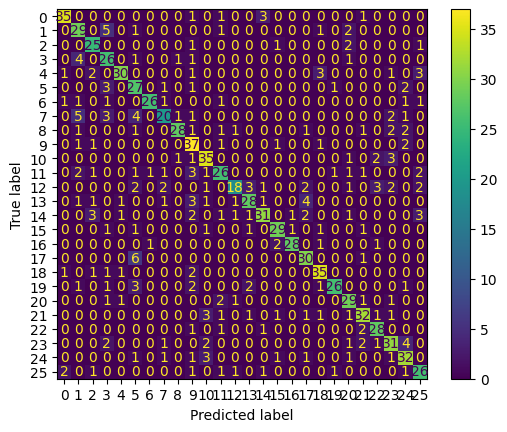

In [20]:
# Since best metrics were for random forest, we obtain confusion matrix for RF 
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_rf)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

In [21]:
# Calculating accuracy of every character in the random forest model to analyse places where the model fails
accuracies = []
  
for i in range(26):
    row = confusion_matrix[i, :]
    total_count = np.sum(row)
    accuracies.append(row[i] / total_count)

for i in range(26):
  print(chr(i + ord('a')) + ": " + str(accuracies[i]))

a: 0.8536585365853658
b: 0.7435897435897436
c: 0.8333333333333334
d: 0.7647058823529411
e: 0.7317073170731707
f: 0.7714285714285715
g: 0.7878787878787878
h: 0.5405405405405406
i: 0.717948717948718
j: 0.8409090909090909
k: 0.813953488372093
l: 0.6341463414634146
m: 0.4864864864864865
n: 0.6666666666666666
o: 0.6595744680851063
p: 0.8055555555555556
q: 0.8484848484848485
r: 0.8108108108108109
s: 0.8536585365853658
t: 0.7027027027027027
u: 0.8055555555555556
v: 0.7441860465116279
w: 0.8484848484848485
x: 0.7045454545454546
y: 0.7619047619047619
z: 0.7428571428571429


In [28]:
# Doing one hot encoding on test and train arrays for applying neural network
import tensorflow as tf

res = []
for t in y_train_nn:
    res.append(ord(t)-ord('a'))
y_train_nn_new = np.array(res)

y_train_nn_new = tf.one_hot(y_train_nn_new,26,)

res2 = []
for t in y_test_nn:
    res2.append(ord(t)-ord('a'))
y_test_nn_new = np.array(res2)

y_test_nn_new = tf.one_hot(y_test_nn_new,26,)

In [30]:
#Neural network
from tensorflow import keras
from tensorflow.keras.optimizers import SGD

#Creating convolusion neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(1000, (3, 3), activation='relu', input_shape=(100, 20, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(500, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(units=500, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=125, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=26, activation=tf.nn.sigmoid)
])

# Compiling and optimizing model
model.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics=['accuracy'])

# Training the model
model.fit(X_train_nn,y_train_nn_new, epochs=10)

Epoch 1/10
125/125 [==============================] - 22s 46ms/step - loss: 2.2539 - accuracy: 0.3252
Epoch 2/10
125/125 [==============================] - 6s 46ms/step - loss: 1.1422 - accuracy: 0.6305
Epoch 3/10
125/125 [==============================] - 6s 46ms/step - loss: 0.8117 - accuracy: 0.7393
Epoch 4/10
125/125 [==============================] - 6s 46ms/step - loss: 0.5378 - accuracy: 0.8217
Epoch 5/10
125/125 [==============================] - 6s 46ms/step - loss: 0.3761 - accuracy: 0.8838
Epoch 6/10
125/125 [==============================] - 6s 46ms/step - loss: 0.2585 - accuracy: 0.9212
Epoch 7/10
125/125 [==============================] - 6s 47ms/step - loss: 0.1569 - accuracy: 0.9525
Epoch 8/10
125/125 [==============================] - 6s 46ms/step - loss: 0.1753 - accuracy: 0.9423
Epoch 9/10
125/125 [==============================] - 6s 46ms/step - loss: 0.1397 - accuracy: 0.9597
Epoch 10/10
125/125 [==============================] - 6s 48ms/step - loss: 0.0856 - accur

In [31]:
# Evaluating Score
score = model.evaluate(X_test_nn,y_test_nn_new)
print(score)

32/32 [==============================] - 1s 23ms/step - loss: 1.5360 - accuracy: 0.7540
[1.5360394716262817, 0.7540000081062317]


**QUESTION 1:**

Accuracy is a commonly used metric for evaluating classification models,including Logistic Regression, Support Vector Machines (SVM), and Random Forest, in optical character recognition (OCR) tasks. However, depending on the specific requirements and characteristics of the OCR application, other metrics can provide additional insights and may be more appropriate.

Here are some alternative metrics that you can consider when comparing OCR models:

1. Precision and Recall: Precision measures the proportion of correctly predicted positive instances (correctly recognized characters) out of the total instances predicted as positive. Recall, on the other hand, measures the proportion of correctly predicted positive instances out of the total actual positive instances. These metrics are particularly useful when there is a class imbalance in the data, where one class (e.g., a specific character) is much more prevalent than others.

2. F1 Score: The F1 score is the harmonic mean of precision and recall and provides a single metric to balance both measures. It can be useful when you want to find a balance between precision and recall.

3. Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC): The ROC curve plots the true positive rate (sensitivity) against the false positive rate (1-specificity) for different classification thresholds. The AUC summarizes the ROC curve by providing a single metric that represents the overall performance of the model. ROC curves and AUC are particularly useful when you want to understand the trade-off between the true positive rate and false positive rate.

4. Mean Average Precision (mAP): This metric is commonly used in object detection tasks but can also be applied to OCR. It measures the average precision across multiple recall levels. It can be useful when you want to assess the overall performance of the OCR system at different levels of recognition.

5. Word Error Rate (WER): WER measures the number of errors (substitutions, deletions, and insertions) between the predicted text and the ground truth. It provides a measure of how well the OCR system performs in terms of the final output.

Accuracy is not always the best way to measure the performance of machine learning models in several scenarios. Here are a few situations where accuracy may not be the most suitable metric:

1. Imbalanced datasets: When the classes in a dataset are imbalanced, meaning one class has significantly more samples than the others, accuracy can be misleading. A model that simply predicts the majority class will achieve a high accuracy, but it may fail to detect the minority class. In such cases, metrics like precision, recall, F1 score, or area under the receiver operating characteristic curve (AUC-ROC) are more informative.

2. Cost-sensitive scenarios: In certain applications, misclassifying certain classes can have more severe consequences or costs compared to others. For example, in medical diagnosis, false negatives (missing a positive case) might be more critical than false positives. In such cases, optimizing for accuracy alone may not align with the desired outcome. Instead, custom evaluation metrics that incorporate the associated costs or consequences of different errors should be considered.

3. Anomalies or rare events: In anomaly detection or rare event prediction tasks, where the focus is on identifying uncommon occurrences, accuracy may not be a suitable metric. Since the majority of instances are expected to be normal or common, even a model that performs poorly on rare events could still achieve high accuracy due to its correct predictions on the majority class. Metrics such as precision at a given recall level, area under the precision-recall curve (AUC-PR), or anomaly detection metrics like the F1 score for anomalies may be more appropriate.

4. Context-specific requirements: Machine learning models are often deployed in specific contexts with unique requirements. Accuracy alone may not capture the full picture of model performance in these cases. For example, in natural language processing tasks like sentiment analysis, accuracy may not consider the varying degrees of sentiment intensity. In such cases, evaluation metrics like mean squared error (MSE) or mean absolute error (MAE) can provide more granular insights.

In summary, the choice of evaluation metric should be guided by the specific characteristics of the dataset, the problem domain, and the desired outcome, taking into account factors such as class imbalance, cost sensitivity, rare events, and context-specific requirements.

**QUESTION 2:**

LOGISTIC REGRESSION:
No hyperparameters changed, as doing that reduced the scores further

SVM:
1. C: Regularization parameter. The strength of the regularization is inversely proportional to C. Reducing the regularization helped improve the scores further
2. Kernel: All kernels other than the default radial basis function (RBF) led to a decrease in accuracy and other scores
3. Gamma: Gamma parameter of RBF controls the distance of the influence of a single training point.

RANDOM FOREST:
1. Number of estimators: increasing number of estimators helped increase accuracy to a point, after which the model started overfitting the training set
2. Criterion: The function to measure the quality of a split. The default criterion are “gini” for the Gini impurity worked best for our use case.
3. Max Depth: Increasing maximum depth of tree will enable better scores till one point after which overfitting starts to happen.
4. Minimum Samples Split: Increasing the split per tree to 3 reinforced the decision making process of the model
5. Max Features: max_features=log2(n_features), the search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than max_features features.

**QUESTION 3:**
The metrics have been calculated in the notebook, these are the observed values:

Accuracy of Logistic Regression: 60.0
Precison score of Logistic Regression: 0.6461632618915196
Recall Score of Logistic Regression: 0.6
F1 Score of Logistic Regression: 0.6052123203662458

Accuracy of SVM: 74.3
Precison score of SVM: 0.7532930283547948
Recall Score of SVM: 0.743
F1 Score of SVM: 0.7449632351782526

Accuracy of Random Forest: 74.9
Precison score of Random Forest: 0.7595426501295861
Recall Score of Random Forest: 0.749
F1 Score of Random Forest: 0.7489883707205912

**QUESTION 4:**
 
The least accuracy is for alphabets 'm' and 'h'. This is because they are clashing with the following alphabets:

m: w

h: b and f


The reason for this is that some of the images are crooked and rotated so the random forest model mistakes the positioning of lines which are quite similar in these characters, making them position of pitfalls. There are many common features in the shapes and writing styles of these characters.

**QUESTION 5:**

We have chosen to train a convolutional neural network for this task. We have put 2 convolutional layers and a few dense layers after that. We have also implemented dropout regularization to prevent overfitting and get better accuracy on the testing set. We get an accuracy of 75.4%, which is better than the one we got with random forest and SVM. We train our model for 10 epochs to get a satisfying accuracy and not overfit the training dataset.